<a href="https://colab.research.google.com/github/Oliveira-LE/Python_1-s_passos/blob/main/Pandas_Limpeza_e_Tratamento_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas: Limpeza e tratamento de dados**

# **Exercício**

Você recebeu a tarefa de normalizar o seguinte arquivo JSON chamado “informacoes.json” referente a algumas informações de identificação de um cliente. O arquivo possui o seguinte conteúdo:

In [ ]:
{
  "nome": "João",
  "idade": 28,
  "enderecos": [
    {
      "tipo": "casa",
      "rua": "Rua A",
      "numero": 123,
      "cidade": "São Paulo"
    },
    {
      "tipo": "trabalho",
      "rua": "Rua B",
      "numero": 456,
      "cidade": "Rio de Janeiro"
    }
  ]
}

In [ ]:
data = {
  "nome": "João",
  "idade": 28,
  "enderecos": [
    {
      "tipo": "casa",
      "rua": "Rua A",
      "numero": 123,
      "cidade": "São Paulo"
    },
    {
      "tipo": "trabalho",
      "rua": "Rua B",
      "numero": 456,
      "cidade": "Rio de Janeiro"
    }
  ]
}

In [ ]:
df = pd.json_normalize(data, record_path='enderecos', meta = "nome", errors='ignore')

In [ ]:
df

,tipo,rua,numero,cidade,nome
0,casa,Rua A,123,São Paulo,João
1,trabalho,Rua B,456,Rio de Janeiro,João




# **Parâmetros do json_normalize**

* data: o objeto JSON a ser normalizado.

* record_path: um caminho para acessar o array de registros dentro do objeto JSON.

* meta: uma lista de colunas adicionais a serem incluídas no DataFrame, além das colunas normalizadas.

* errors: como lidar com erros de normalização. Os valores possíveis são "raise" (lançar um erro), "ignore" (ignorar o erro).

* sep: separador de colunas usado para concatenar as chaves do objeto JSON aninhado. O padrão é ".".



In [ ]:
import pandas as pd

data = {
    "empresa": "alura",
    "funcionarios": [
        {"nome": "Alice", "endereço": {"cidade": "São Paulo", "estado": "SP"}},
        {"nome": "Bob", "endereço": {"cidade": "Rio de Janeiro", "estado": "RJ"}}
    ]
}

df = pd.json_normalize(data, record_path='funcionarios', meta = "empresa", errors='ignore')

In [ ]:
df

,nome,endereço.cidade,endereço.estado,empresa
0,Alice,São Paulo,SP,alura
1,Bob,Rio de Janeiro,RJ,alura


# **Por que alterar o tipo de uma coluna?**

Fazer o cast das colunas para as tipagens corretas é importante antes de inserir em um modelo de machine learning por diversos motivos:

    * Precisão dos resultados
    * Velocidade de processamento
    * Compatibilidade do modelo
    * Evita erros



# **Exercício 2**

Sua tarefa é realizar alguns tratamentos e deixar esse arquivo JSON como um Pandas DataFrame, sem dados vazios e com a tipagem das colunas de forma correta. Dados abaixo:

In [ ]:
{
  "pessoas": [
    {
      "nome": "João",
      "idade": "25",
      "endereco": {
        "rua": "Rua A",
        "numero": 123,
        "cidade": "São Paulo"
      },
      "telefones": [
        "11 1111-1111",
        "11 2222-2222"
      ]
    },
    {
      "nome": "Maria",
      "idade": 30,
      "endereco": {
        "rua": "",
        "numero": 456,
        "cidade": "Rio de Janeiro"
      },
      "telefones": [
        "21 3333-3333"
      ]
    }
  ]
}

In [ ]:
data = {
  "pessoas": [
    {
      "nome": "João",
      "idade": "25",
      "endereco": {
        "rua": "Rua A",
        "numero": 123,
        "cidade": "São Paulo"
      },
      "telefones": [
        "11 1111-1111",
        "11 2222-2222"
      ]
    },
    {
      "nome": "Maria",
      "idade": 30,
      "endereco": {
        "rua": "",
        "numero": 456,
        "cidade": "Rio de Janeiro"
      },
      "telefones": [
        "21 3333-3333"
      ]
    }
  ]
}

In [ ]:
df = pd.json_normalize(data, record_path=['pessoas'])

In [ ]:
df

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      object
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 224.0+ bytes


In [ ]:
df['idade'] = df['idade'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      int64 
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(2), object(4)
memory usage: 224.0+ bytes


In [ ]:
df_filtrado = df.query('`endereco.rua` != ""')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      int64 
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(2), object(4)
memory usage: 224.0+ bytes


In [ ]:
df_filtrado

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo


# **Dados duplicados e nulos**

# **Identificação de dados duplicados**

# **Método** duplicated() **da biblioteca Pandas**

# **Exemplo:**

In [ ]:
dados_sem_vazio.duplicated()

# **Quantidade de dados duplicados**

# **Exemplo:**

In [ ]:
dados_sem_vazio.duplicated().sum()

# **Quais são os dados duplicados?**

# **Exemplo:**

In [ ]:
filtro_duplicadas = dados_sem_vazio.duplicated()
fitro_duplicadas
dados_sem_vazio[filtro_duplicadas]

# **Tratamento de dados duplicados**

# **Motivos principais para a remoção das amostras duplicadas:**

    * Viés do modelo: se há amostras duplicadas no conjunto de dados, pode ser que o modelo de machine learning dê mais importância para essas amostras repetidas.
    * Melhora do desempenho do modelo: se inserimos amostras duplicadas, vão ser necessários mais cálculos e poder de processamento, além de ser um desperdício computacional trabalhar com amostras com o mesmo valor e que transmitem a mesma informação.
    * Aumento da qualidade dos resultados: vamos inserir informações únicas, sem dados repetidos. Ou seja, vão ser mais relevantes para o modelo.

# **Exemplo:**

In [ ]:
dados_sem_vazio.drop_duplicates(inplace=True)

# **Métodos da biblioteca Pandas para identificar dados nulos:**

isnull(): retorna um DataFrame de valores booleanos, no qual True indica o valor nulo e False indica o valor válido.

notnull(): retorna um DataFrame de valores booleanos, no qual True indica o valor válido e False indica o valor nulo.

isna(): retorna um DataFrame de valores booleanos, com True indicando o valor nulo e False o valor válido (a mesma funcionalidade do método isnull()).

notna(): retorna um DataFrame de valores booleanos, em que True indica o valor válido e False indica o valor nulo (a mesma funcionalidade do método notnull()).



# **inserindo a moda nos dados**

# **Exercício**

Imagine que você esteja trabalhando com um conjunto de dados que contém informações sobre vendas em uma loja. Algumas dessas informações podem estar faltando, como o tamanho de alguns produtos. Nesse caso, você pode usar a moda para preencher os valores nulos. Isso significa que você irá substituir os valores faltantes pelo preço mais comum dos produtos. Dados abaixo:

In [1]:
import pandas as pd

df = pd.DataFrame({'Produto': ['Camisa', 'Calça', 'Tênis', 'Meia', 'Boné'],
                   'Tamanho': ['P', 'M', 'M', None, None],
                   'Preço': [49.99, 79.99, 199.99, 9.99, 39.99]})

df['Tamanho'].fillna(df['Tamanho'].mode()[0], inplace=True)
print(df)

  Produto Tamanho   Preço
0  Camisa       P   49.99
1   Calça       M   79.99
2   Tênis       M  199.99
3    Meia       M    9.99
4    Boné       M   39.99


# **OUTLIERS**

Existem várias técnicas para detectar outliers em um conjunto de dados.
Algumas das mais comuns são:
* Z-score
* Regra dos 3 sigmas
* Análise de dispersão.

# **Z-score**

O z-score é uma medida estatística que indica a quantos múltiplos do desvio-padrão um dado está distante da média. Para detectar outliers utilizando essa medida, basta calcular o z-score de cada dado e verificar se ele está muito distante da média. Se o z-score for maior do que um determinado limite, podemos considerar esse dado como um outlier.

O limite geralmente utilizado é de 3 desvios-padrões, ou seja, se o z-score de um dado for maior do que 3, podemos considerá-lo como um outlier.

Exemplo:

In [23]:
import numpy as np
data = np.array([10, 20, 30, 40, 150, 50, 60, 70, 80, 90, 100, 350])
z_scores = (data - np.mean(data)) / np.std(data)
limite = 3
outliers = data[np.abs(z_scores) > limite]
print("Outliers encontrados:", outliers)

Outliers encontrados: [350]


# **Regra dos 3 sigmas**

A regra dos 3 sigmas é uma técnica que utiliza a distribuição normal para identificar outliers. Ela diz que cerca de 99,7% dos dados estarão dentro de 3 desvios padrão da média. Portanto, se um dado estiver a mais de 3 desvios padrão da média, podemos considerá-lo como um outlier.

In [26]:
import numpy as np

In [28]:
dados = np.array([0, 10, 12, 13, 15, 16, 18, 20, 22, 25, 30, 35, 40, 50, 350])

In [29]:
media = np.mean(dados)

In [30]:
desvio_padrao = np.std(dados)

In [32]:
limite_superior = media + (3 * desvio_padrao)


In [33]:
limite_inferior = media - (3 * desvio_padrao)

In [34]:
outliers = dados[(dados > limite_superior) | (dados < limite_inferior)]
print("Outliers:", outliers)

Outliers: [350]


# **Análise de Dispersão**

A análise de dispersão é uma técnica que utiliza gráficos para identificar outliers. Um gráfico comumente utilizado é o boxplot que mostra a distribuição dos dados em quartis. Os outliers são identificados como pontos fora dos limites superior e inferior do boxplot.

Outliers encontrados: []


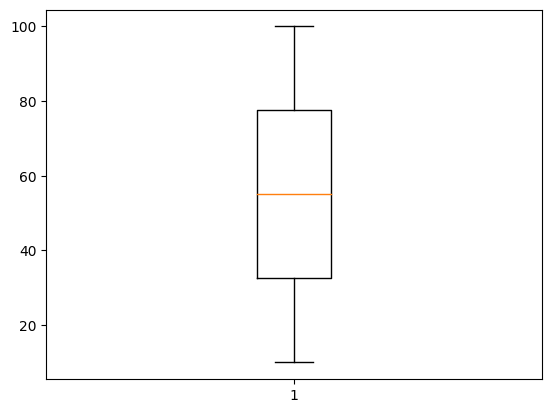

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Criação do boxplot
fig, ax = plt.subplots()
ax.boxplot(data)

# Identificação dos outliers
outliers = data[(data < np.percentile(data, 25) - (1.5 * (np.percentile(data, 75) - np.percentile(data, 25)))) |
                (data > np.percentile(data, 75) + (1.5 * (np.percentile(data, 75) - np.percentile(data, 25))))]

print("Outliers encontrados:", outliers)

# **Remoção de Outliers**

# **Exercício**

Você trabalha em um banco como cientista de dados e recebeu o seguinte conjunto de dados abaixo para analisar:

Foi informado que nessa base de dados há possíveis fraudes que podem ser identificadas através dos outliers no “valor da transação”. Basicamente a fraude seria um outlier.

Sua missão é construir uma função que recebe dois parâmetros, a coluna que você quer analisar se tem outlier e o DataFrame em questão. A intenção de fazer isso é aproveitar novamente essa função tanto para outras colunas quanto para outros DataFrames futuramente em outras análises. O método que deve ser implementado para identificação do outlier é do intervalo interquartil.

In [44]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150,
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250,
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

In [45]:
def calc_outliers(column, dataframe):

  # calculando o IQR e definindo o limite para outliers
  Q1 = dataframe[column].quantile(0.25)
  Q3 = dataframe[column].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # identificando os outliers
  outliers = dataframe[(dataframe[column] < limite_inferior) | (dataframe[column] > limite_superior)]

  # retornando os outliers
  return outliers

In [46]:
print(calc_outliers('Valor da transação', df))

    ID da transação  Valor da transação Data da transação Local da transação
5                 6                 913        2022-01-06   Nova Iorque, EUA
16               17                 805        2022-01-17   Los Angeles, EUA
28               29                 800        2022-01-29         Miami, EUA


# **Variáveis Categóricas**

são uma forma de agrupar informações em categorias diferentes, sem um valor numérico associado a elas, como o caso das variáveis numéricas.

# **Substituindo valores**



    Alguns modelos trabalham com números exclusivamente. Esse é o caso de modelos mais robustos.

Faremos o seguinte mapeamento:

    De nao para 0;
    De sim para 1;
    De masculino para 0;
    E de feminino para 1.

In [49]:
mapeamento = {
    'nao': 0,
    'sim': 1,
    'masculino': 0,
    'feminino': 1
}

Converter valores categóricos em numéricos permite o uso em algoritmos de aprendizado de máquina.

# **One Hot Encoder (ou Dummy)**

A técnica que vamos aplicar pode ser chamada tanto de One Hot Encoder quanto de Dummy. Para evidenciar melhor como ela funciona, vamos utilizar um exemplo prático no notebook, dividido em duas células.

Na primeira célula da seção "One Hot Encoder (dummy)", temos o seguinte código:

In [50]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

Podemos pensar na variável de séries (s) como o dataframe de uma coluna, sendo os valores a, b, c e a as nossas categorias. Temos então 3 categorias distintas: a, b e c.

Agora vamos utilizar o método get_dummies() da biblioteca do Pandas. Para isso, digitamos o seguinte código em uma nova célula:

In [51]:
pd.get_dummies(s)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False


O método get_dummies() é justamente a aplicação da técnica One Hot Encoder. Com ele, foi retornado um dataframe com quatro amostras, com os índices de 0 a 3 e três colunas: a, b e c.